# Assignment 3 --- Data Science Course

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

titanic = pd.read_excel("titanic.xls", "titanic")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## 1. Create a horizontal bar chart for number of passengers survived by class

ERROR! Session/line number was not unique in database. History logging moved to new session 12


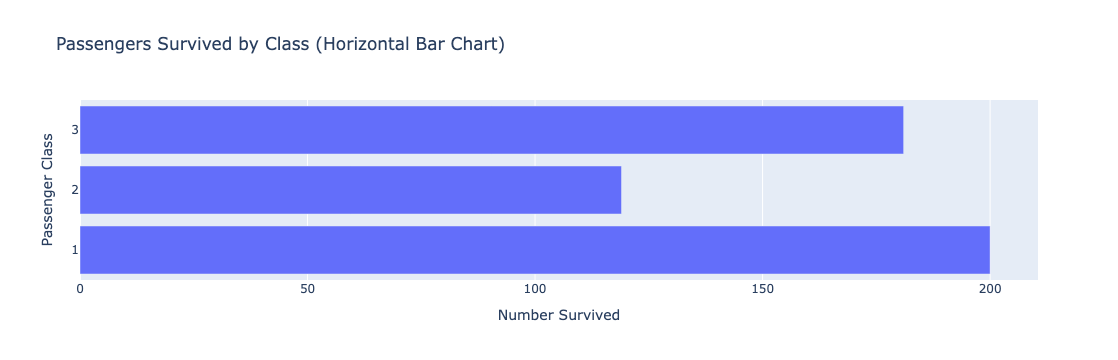

In [2]:
survived_by_class = titanic.groupby("pclass")["survived"].sum().reset_index()

fig = px.bar(
    survived_by_class,
    x="survived",
    y="pclass",
    orientation="h",
    title="Passengers Survived by Class (Horizontal Bar Chart)",
    labels={"pclass": "Passenger Class", "survived": "Number Survived"}
)
fig.show()

## 2. Create a vertical bar chart for passengers survived by class and gender

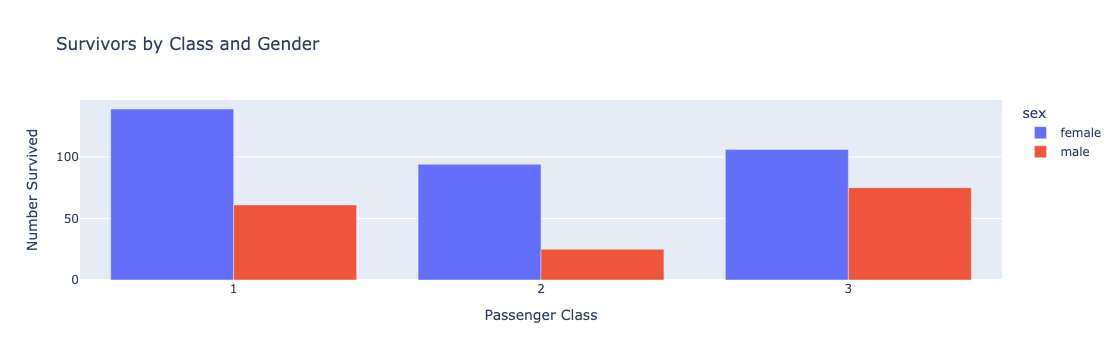

In [3]:
survived_class_gender = titanic.groupby(["pclass", "sex"])["survived"].sum().reset_index()

fig = px.bar(
    survived_class_gender,
    x="pclass",
    y="survived",
    color="sex",
    barmode="group",
    title="Survivors by Class and Gender",
    labels={"pclass": "Passenger Class", "survived": "Number Survived"}
)
fig.show()


## 3. Create a stacked chart survived vs dead for different classes and gender

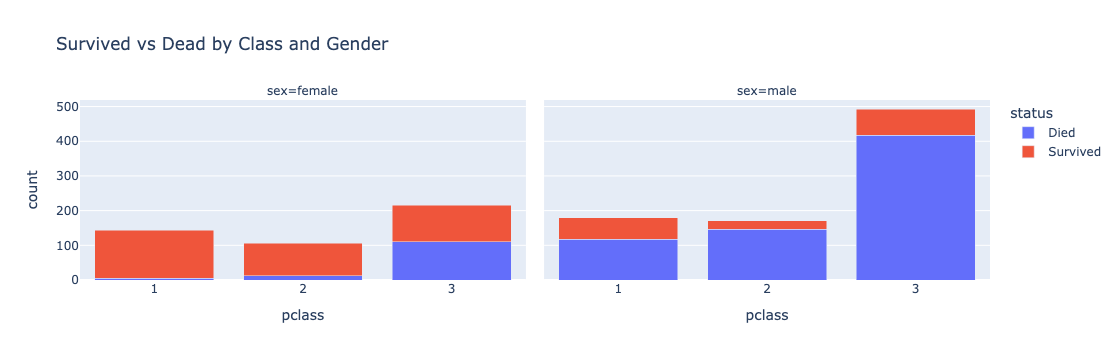

In [4]:
titanic["status"] = titanic["survived"].map({1: "Survived", 0: "Died"})

survival_data = titanic.groupby(["pclass", "sex", "status"]).size().reset_index(name="count")

fig = px.bar(
    survival_data,
    x="pclass",
    y="count",
    color="status",
    facet_col="sex",
    barmode="stack",
    title="Survived vs Dead by Class and Gender"
)
fig.show()


## 4. Plot histogram of fares paid for passengers in cabin 30 (should include B30, C30, and D30)

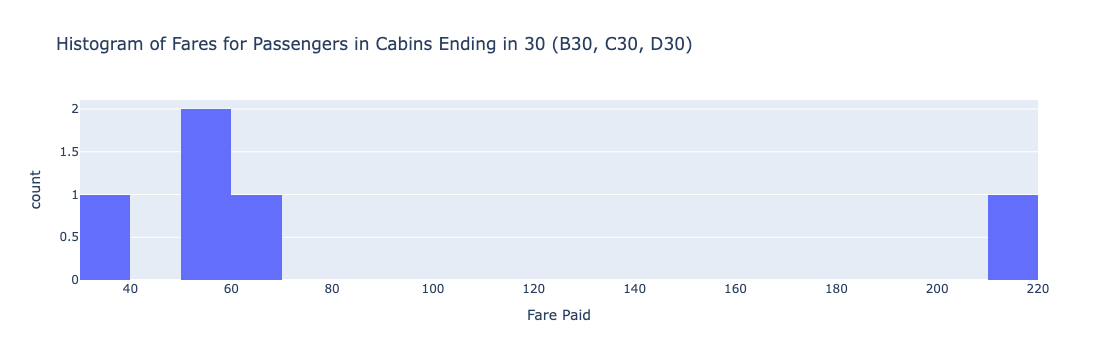

In [5]:
cabin_30 = titanic[titanic["cabin"].astype(str).str.contains("30", na=False)]

fig = px.histogram(
    cabin_30,
    x="fare",
    nbins=20,
    title="Histogram of Fares for Passengers in Cabins Ending in 30 (B30, C30, D30)",
    labels={"fare": "Fare Paid"}
)
fig.show()


## 5. Create a box plot of the fares by passenger class

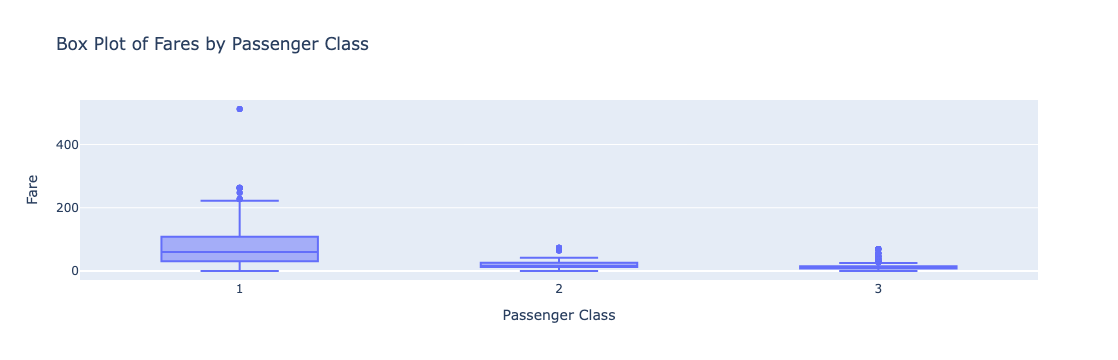

In [6]:
fig = px.box(
    titanic,
    x="pclass",
    y="fare",
    title="Box Plot of Fares by Passenger Class",
    labels={"pclass": "Passenger Class", "fare": "Fare"}
)
fig.show()


## 6. Create a box plot of the age by passenger class

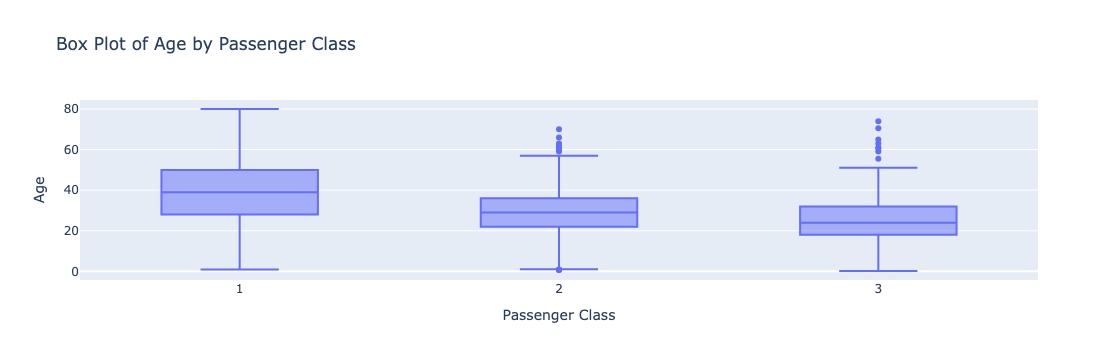

In [7]:
fig = px.box(
    titanic,
    x="pclass",
    y="age",
    title="Box Plot of Age by Passenger Class",
    labels={"pclass": "Passenger Class", "age": "Age"}
)
fig.show()
